In [99]:
from qiskit import QuantumCircuit
import pyzx as zx

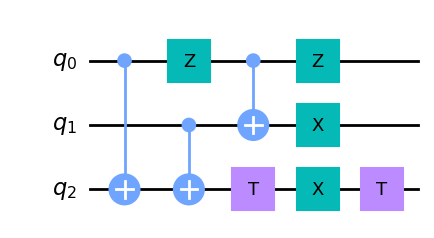

In [100]:
qc = QuantumCircuit(3)
qc.cnot(0, 2)
qc.z(0)
qc.cnot(1, 2)
qc.t(2)
qc.cnot(0,1)
qc.x(2)
qc.t(2)
qc.z(0)
qc.x(1)
qc.draw("mpl")

In [101]:
# From qasm (qc) to qasm file
qasm = qc.qasm()
with open("qasm_circ.qasm", "w") as f:
    f.write(qasm)

In [102]:
circ = zx.Circuit.load("qasm_circ.qasm")
print(type(circ))

<class 'pyzx.circuit.Circuit'>


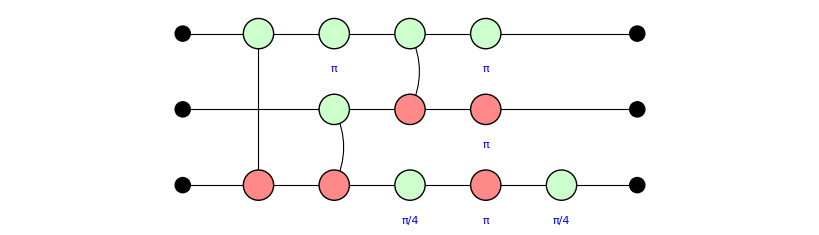

In [103]:
zx.draw_matplotlib(circ)

In [104]:
circ1 = circ.copy()
circ = circ.to_graph()
g = circ.copy()
zx.clifford_simp(g)

0

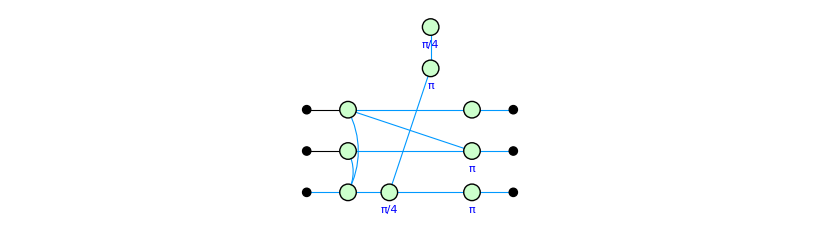

In [111]:
g.normalize()
zx.draw_matplotlib(g)

In [106]:
circ2 = g.copy()
circ2.normalize()
circ2 = zx.extract_circuit(circ2)
zx.draw(circ2)

In [108]:
circ3 = zx.basic_optimization(circ2)
zx.draw(circ3)

In [109]:
circ1 = circ1.to_graph()
print(type(circ1))
t1 = circ1.to_tensor()
t2 = circ3.to_tensor()
zx.compare_tensors(t1, t2, preserve_scalar=False)

<class 'pyzx.graph.graph_s.GraphS'>


True

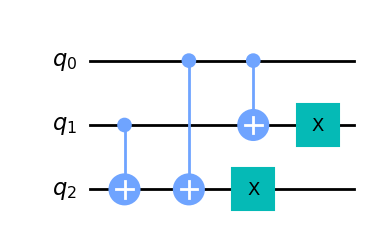

In [110]:
circ3_qasm_text = circ3.to_qasm()
qc = QuantumCircuit.from_qasm_str(circ3_qasm_text)
qc.draw("mpl")

In [113]:
import random

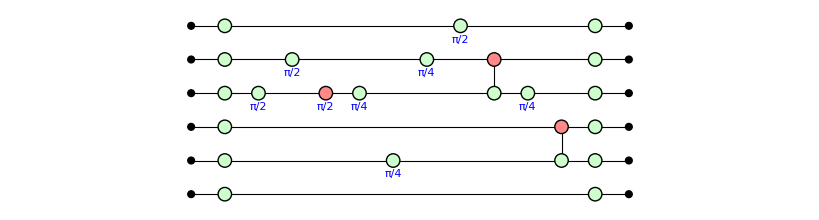

In [115]:
qubit_amount = 6
Depth = 10
random.seed(50)
circ4 = zx.generate.cliffordT(qubit_amount, Depth)
zx.draw_matplotlib(circ4, labels=False)